In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas

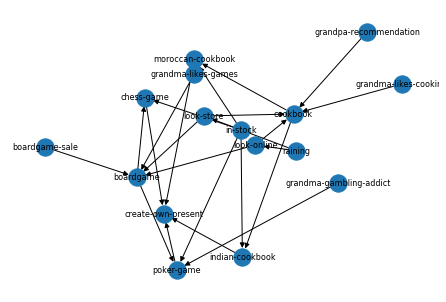

In [2]:
present_network = BayesNet()
present_network.load_from_bifxml('testing/Christmas-present-problem.BIFXML')
present_network.draw_structure(node_size=300, font_size=8)
reasoner = BNReasoner(present_network)

In [3]:
# calculate prior and posterior marginal
priori_result = reasoner.prior_marginal(['moroccan-cookbook', 'grandpa-recommendation'])
priori_result2 = reasoner.prior_marginal(['create-own-present', 'look-online'])
post_result = reasoner.posterior_marginal(['poker-game'], [('grandma-gambling-addict', True)])
post_result2 = reasoner.posterior_marginal(['indian-cookbook'], [('in-stock', False)])
print(priori_result)
print(priori_result2)
print(post_result)
print(post_result2)

  moroccan-cookbook grandpa-recommendation         p
0             False                  False  0.630654
1             False                   True  0.232691
2              True                  False  0.069346
3              True                   True  0.067309
  look-online create-own-present         p
0       False              False  0.166102
1       False               True  0.393898
2        True              False  0.239157
3        True               True  0.200843
  poker-game         p
0      False  0.984605
1       True  0.015395
  indian-cookbook    p
0           False  1.0
1            True  0.0


In [5]:
# calculate a MAP instance for Christmas present network
map_result = reasoner.map_instance(['boardgame'], [('grandma-likes-games', True)])
display(map_result)

,raining,look-online,look-store,grandma-likes-games,boardgame,boardgame-sale,p
15,False,False,True,True,True,True,0.12096


In [6]:
# retrieve all cpts
pandas.set_option('display.max_rows', 20)
for variable in present_network.get_all_variables():
    display(present_network.get_cpt(variable))

,raining,look-online,p
0,False,False,0.8
1,False,True,0.2
2,True,False,0.2
3,True,True,0.8


,raining,look-store,p
0,False,False,0.2
1,False,True,0.8
2,True,False,0.8
3,True,True,0.2


,raining,p
0,False,0.6
1,True,0.4


,grandma-likes-cooking,p
0,False,0.2
1,True,0.8


,grandma-likes-games,p
0,False,0.3
1,True,0.7


,grandma-likes-cooking,grandpa-recommendation,look-online,look-store,cookbook,p
0,False,False,False,False,False,1.00
1,False,False,False,False,True,0.00
2,False,False,False,True,False,0.95
3,False,False,False,True,True,0.05
4,False,False,True,False,False,0.85
...,...,...,...,...,...,...
27,True,True,False,True,True,0.90
28,True,True,True,False,False,0.20
29,True,True,True,False,True,0.80
30,True,True,True,True,False,0.05


,in-stock,cookbook,indian-cookbook,p
0,False,False,False,1.0
1,False,False,True,0.0
2,False,True,False,1.0
3,False,True,True,0.0
4,True,False,False,1.0
5,True,False,True,0.0
6,True,True,False,0.5
7,True,True,True,0.5


,in-stock,cookbook,moroccan-cookbook,p
0,False,False,False,1.0
1,False,False,True,0.0
2,False,True,False,1.0
3,False,True,True,0.0
4,True,False,False,1.0
5,True,False,True,0.0
6,True,True,False,0.5
7,True,True,True,0.5


,boardgame-sale,grandma-likes-games,look-online,look-store,boardgame,p
0,False,False,False,False,False,1.00
1,False,False,False,False,True,0.00
2,False,False,False,True,False,0.99
3,False,False,False,True,True,0.01
4,False,False,True,False,False,0.98
...,...,...,...,...,...,...
27,True,True,False,True,True,0.90
28,True,True,True,False,False,0.15
29,True,True,True,False,True,0.85
30,True,True,True,True,False,0.03


,grandma-gambling-addict,boardgame,in-stock,poker-game,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,1.00
3,False,False,True,True,0.00
4,False,True,False,False,1.00
5,False,True,False,True,0.00
6,False,True,True,False,0.25
7,False,True,True,True,0.75
8,True,False,False,False,1.00
9,True,False,False,True,0.00


,boardgame,in-stock,chess-game,p
0,False,False,False,1.0
1,False,False,True,0.0
2,False,True,False,1.0
3,False,True,True,0.0
4,True,False,False,1.0
5,True,False,True,0.0
6,True,True,False,0.6
7,True,True,True,0.4


,in-stock,p
0,False,0.25
1,True,0.75


,grandpa-recommendation,p
0,False,0.7
1,True,0.3


,boardgame-sale,p
0,False,0.5
1,True,0.5


,grandma-gambling-addict,p
0,False,0.7
1,True,0.3


,moroccan-cookbook,indian-cookbook,chess-game,poker-game,create-own-present,p
0,False,False,False,False,False,0.0
1,False,False,False,False,True,1.0
2,False,False,False,True,False,1.0
3,False,False,False,True,True,0.0
4,False,False,True,False,False,1.0
...,...,...,...,...,...,...
27,True,True,False,True,True,0.0
28,True,True,True,False,False,1.0
29,True,True,True,False,True,0.0
30,True,True,True,True,False,1.0


In [ ]:
# calculate a MPE instance for Christmas present network
MPE_result = reasoner.mpe([('grandma-likes-games', True)])
display(MPE_result)